<a href="https://colab.research.google.com/github/brenocavi/analise_risco-_de-cr-dito/blob/main/Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Avaliação de Risco de Crédito

Uma das formas dos bancos conseguirem um grande faturamente, é atravês de emprestimos. A rotação do dinheiro, com retorno a juros mais altos, faz com que os negócio dos banco seja rentável. Porém, nesse processo algo um passo muito importante é tentar reduzir a inadimplência dos clientes.

Com isso, formas de identificar potenciais riscos de não pagamento é de suma importância para o balanço financeiro das empresas. As empresas têm investido em formar de reduzir o risco de *default*.


*Default* é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

<p align=center>
  <img src="https://images.unsplash.com/photo-1556742502-ec7c0e9f34b1?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=687&q=80" width="40%">
</p>

A utilização de soluções pautadas em modelos de *Machine Learning* têm sido utilizadas como auxilio nessa missão. Algumas Fintechs, como é o caso do Nubank, têm se mostrado pioneira na nesse tipo de solução. 

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnveM5um_ymZwofG_ABW5aYe0zlsMrxNZGhw&usqp=CAU" width=""></p>
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



> OBJETIVO: Prever a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.



## Importar os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

## Dicionário de variáveis 

* **ids**: Identificação individual de cliente;
* **target_default**: Inadiplência do cliente;
* **score_1 ... score_6**: Pontuação de orgões externos;
* **risk_rate**: Taxa de risco de inadiplência;
* **last_amount_borrowed**: Quantia em dinheiro pego no último emprestimo realizado; 
* **last_borrowed_in_months**: Quantia em dinhiero pego em emprestimo em meses; 
* **credit_limit**: Limite de crédito disponível para emprestimo;
* **reason**: Razão apresentada para solicitar o emprestimo;
* **income**: Renda mensal do cliente;
* **facebook_profile**: Perfil do Facebook do cliente;
* **state**: Estado em que o cliente mora;
* **zip**: CEP;
* **channel**: Canal de comunição realizada com cliente 
* **job_name**: Profissão do cliente;
* **real_state**: Se o cliente possui casa própria ou mora de aluguel;
* **ok_since**: Período com emprestimo quitado;
* **n_bankruptcie**: Vezes que o cliente declarou falência; 
* **n_defaulted_loans**: Vezes que ficou na situação de inadimplente, com pagamento de emprestimo;
* **n_accounts**: Quantidade de contas bancária que o cliente possui; 
* **n_issues**: Número de problemas relatados
* **application_time_applied**: Tempo para processar a solicitação de emprestimo;
* **application_time_in_funnel**: Tempo para processar a solicitação de emprestimo em sequência;
* **email**: e-mail do cliente;
* **external_data_provider_credit_checks_last_2_year**: Quantidade de vezes que foi solicitada pontuação de crédito do cliente a uma agência externa nos últimos dois anos; 
* **external_data_provider_credit_checks_last_month**:  Quantidade de vezes que foi solicitada pontuação de crédito do cliente a uma agência externa no último mês; 
* **external_data_provider_credit_checks_last_year**:  Quantidade de vezes que foi solicitada pontuação de crédito do cliente a uma agência externa no último ano; 
* **external_data_provider_email_seen_before**:
* **external_data_provider_first_name**: Nome da agência de crédito fornecedora da pontuação do cliente;
* **external_data_provider_fraud_score**: Pontuação fornecida agência específica, demonstra potencial fraudador;
* **lat_lon**: Coordendas da residência do cliente;
* **marketing_channel**: Canal pelo qual cliente soube do serviço;
* **profile_phone_number**: Número de telefone do cliente;
* **reported_income**: Renda reportada;
* **shipping_state**: Estado de envio;
* **shipping_zip_code**: Código postal de envio;
* **profile_tags**: Categorização interna do sistema Nubank
* **user_agent**: Identificação do provedor utilizado pela; usuário;
* **target_fraud**: Coluna alvo da análise.


In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE



In [ ]:
#importante os dados 
df= pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0')

Como primeiro ponto de atenção existem algumas colunas, como por exemplo *score_1* e *score_2*, possuem valores ficticios ou codificadaos. Algumas outras colunas que poderiam conter dados pessoas de cliente, apresentam esse mesmo padrão. Para essas colunas será necessário verificar, atravês da quantidade de valores unicos, se é possível extrair algum tipo de informação. 

In [ ]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [ ]:
df.columns

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

Vemos que o dataset é composto por valores númericos e texto. Aparentemete a única coluna que possui todos os valores preenchidos, é a identificação dos clientes. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

É possivel observar que o dataset possui diversas colunas que valores ausentes. Algumas dessas colunas, por apresentarem grande porcentagem ou por possivelmente não acrescentar informações relevantes serão retiradas do dataset utilizado no treino do modelo. 

Quanto as valores únicos, algumas colunas, como por exemplo *channel* e *external_data_provider_credit_checks_last_2_year* apresentam apenas um valor, o que não agregar valor para análise. 

In [ ]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defaulted_loans       

In [ ]:
df.nunique().sort_values(ascending=False)

ids                                                 45000
profile_phone_number                                45000
score_4                                             45000
score_5                                             45000
score_6                                             45000
income                                              41211
reported_income                                     40025
application_time_applied                            35543
external_data_provider_first_name                   32886
job_name                                            32265
shipping_zip_code                                   28263
profile_tags                                        26131
lat_lon                                             22412
credit_limit                                        20928
reason                                              14874
last_amount_borrowed                                14325
external_data_provider_fraud_score                   1001
zip           

Para facilitar a visualização das variáveis do tipo objeto, selecionei-as aplicando o método select_dtypes. Desta forma conseguimos ter visão clara das variáveis codificidas. ids, score_1, score_2, reason, facebook_profile, state, zip, channel, job_name, real_state, essas colunas possivelmente serão retiradas do dataset 

In [ ]:
a = df.select_dtypes(include=['object'])
a.head()

,ids,target_default,score_1,score_2,reason,facebook_profile,state,zip,channel,job_name,...,application_time_applied,email,external_data_provider_first_name,lat_lon,marketing_channel,profile_phone_number,shipping_state,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,...,07:52:34,outlook.com,leidelaura,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,BR-MT,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,...,02:34:29,gmail.com,diocezio,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,BR-RS,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,...,00:60:02,gmail.com,veralucia,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,BR-RR,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,...,11:20:49,spgov.com,venice,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,BR-RN,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,...,13:39:03,gmail.com,darzisa,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,BR-MT,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Com o descritivo estatítico para as variáveis numéricas, vemos algumas informações estranhas. Na coluna *reported_income* o valor máxim oé preenchido com "inf", pode ser uma informação preenchida de forma incorreta. Na coluna *credit_limit* o valor minímo é de zero, o que não condiz com a realidade.

In [ ]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Na variável alvo, existe um desbalanceamento e existe mais clientes sem risco de inadimplência do que com risco. 

<Axes: xlabel='target_default', ylabel='count'>

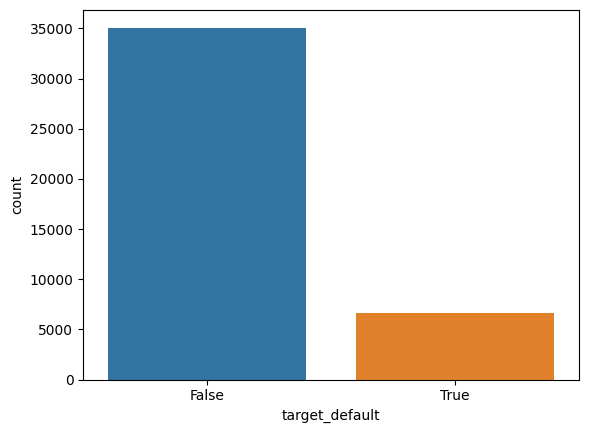

In [ ]:
sns.countplot(x = 'target_default' , data =df)

#Preparação dos dados 

Como vimos o dataset possui diversas colunas que necessitam de tratamento. Nos casos de *target_fraud*, não ser o alvo da analise e ser a com maior percentual de dados ausentes, e as colunas *external_data_provider_credit_checks_last_2_year* terem mais da metade dos dados ausentes, essas serão excluídas. 

As colunas que possuem valores do tipo *srtings* e são dados "codificados", por não acresentarem  nenhuma informação relevante foram excluídas. 

In [ ]:
df_copy = df.copy()

df_copy.drop(columns=['target_fraud', 'external_data_provider_credit_checks_last_2_year',
                      'ids', 'score_2', 'reason', 'state', 'channel', 'zip', 
                      'external_data_provider_first_name','real_state', 'job_name', 
                      'user_agent', 'profile_tags','lat_lon','profile_phone_number', 
                      'email', 'facebook_profile', 'shipping_zip_code','application_time_applied',
                      ], inplace=True )

A divisão por estados nos mostra que São Paulo é o estado com maior número de pessoas inadinplêntes, o que é de se esperar já que é o estado com maior número de pessoas. O estado, que pela proporção pessoas, chama a atenção é Roraima, no total de pessoas está similar aos demais estados, porém, tem mais pessoas indadimplentes. 

In [ ]:
df_copy['shipping_state'] = df_copy['shipping_state'].apply(lambda x: x.replace('BR-', ''))

In [ ]:
df_copy['shipping_state']

0        MT
1        RS
2        RR
3        RN
4        MT
         ..
44995    GO
44996    RO
44997    SP
44998    SP
44999    MT
Name: shipping_state, Length: 45000, dtype: object

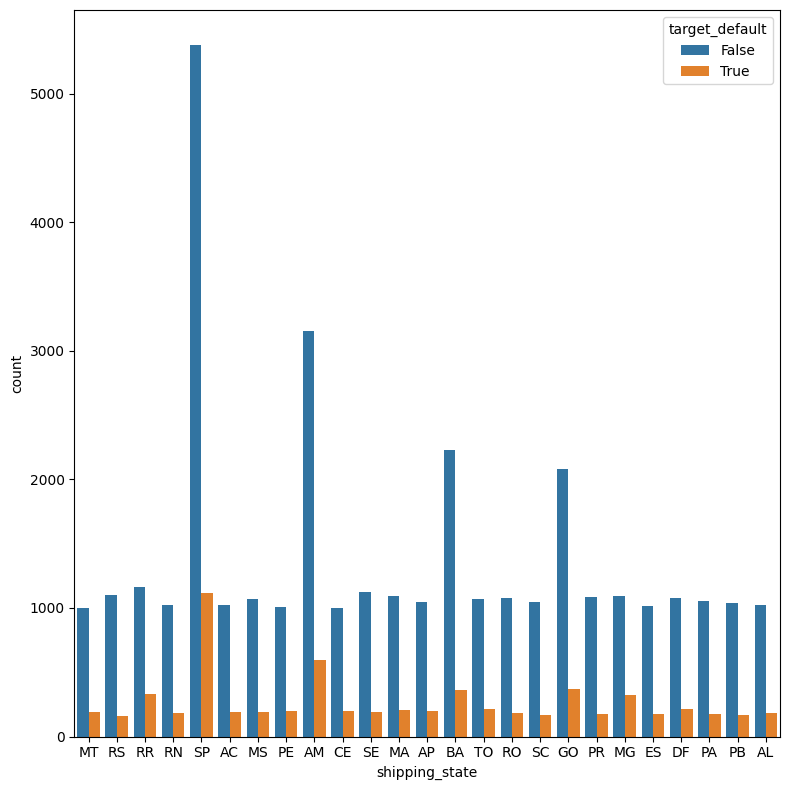

In [ ]:
fig,ax =plt.subplots(figsize=(8,8))

sns.countplot(x='shipping_state', data=df_copy, hue='target_default')

plt.tight_layout()

A variável *score_1* por apresentar apenas 7 valores distintos pode representar algum tipo de classificação para o cliente. Sendo assim, será feita a substitução dos valores codificados por categorias A,B,C,D,E,F,G. 

In [ ]:
df_copy['score_1'].value_counts()

DGCQep2AE5QRkNCshIAlFQ==    14523
1Rk8w4Ucd5yR3KcqZzLdow==    11376
4DLlLW62jReXaqbPaHp1vQ==     7459
8k8UDR4Yx0qasAjkGrUZLw==     6458
e4NYDor1NOw6XKGE60AWFw==     3015
smzX0nxh5QlePvtVf6EAeg==     1307
fyrlulOiZ+5hoFqLa6UbDQ==      300
Name: score_1, dtype: int64

Além desses valores acima situados, a colunas possui ainda alguns valores ausentes. Esses valores foram preenchidos com dados que mais se repetiu.

In [ ]:
df_copy['score_1'].unique()

array(['1Rk8w4Ucd5yR3KcqZzLdow==', 'DGCQep2AE5QRkNCshIAlFQ==',
       '8k8UDR4Yx0qasAjkGrUZLw==', '4DLlLW62jReXaqbPaHp1vQ==',
       'e4NYDor1NOw6XKGE60AWFw==', 'smzX0nxh5QlePvtVf6EAeg==',
       'fyrlulOiZ+5hoFqLa6UbDQ==', nan], dtype=object)

In [ ]:
df_copy['score_1'].isna().sum()

562

In [ ]:
df_copy['score_1'].fillna('DGCQep2AE5QRkNCshIAlFQ==', inplace=True)

In [ ]:
df_copy['score_1'].unique()

array(['1Rk8w4Ucd5yR3KcqZzLdow==', 'DGCQep2AE5QRkNCshIAlFQ==',
       '8k8UDR4Yx0qasAjkGrUZLw==', '4DLlLW62jReXaqbPaHp1vQ==',
       'e4NYDor1NOw6XKGE60AWFw==', 'smzX0nxh5QlePvtVf6EAeg==',
       'fyrlulOiZ+5hoFqLa6UbDQ=='], dtype=object)

In [ ]:
df_copy['score_1'].replace('1Rk8w4Ucd5yR3KcqZzLdow==', 'Score_A', inplace=True)
df_copy['score_1'].replace('8k8UDR4Yx0qasAjkGrUZLw==', 'Score_B', inplace=True)
df_copy['score_1'].replace('e4NYDor1NOw6XKGE60AWFw==', 'Score_C', inplace=True)
df_copy['score_1'].replace('fyrlulOiZ+5hoFqLa6UbDQ==', 'Score_D', inplace=True)
df_copy['score_1'].replace('DGCQep2AE5QRkNCshIAlFQ==', 'Score_E', inplace=True)
df_copy['score_1'].replace('4DLlLW62jReXaqbPaHp1vQ==', 'Score_F', inplace=True)
df_copy['score_1'].replace('smzX0nxh5QlePvtVf6EAeg==', 'Score_G', inplace=True)


In [ ]:
df_copy['score_1'].unique()

array(['Score_A', 'Score_E', 'Score_B', 'Score_F', 'Score_C', 'Score_G',
       'Score_D'], dtype=object)

Passaremos a tratar os dados númericos agora. O valor np.inf, conota um valor positivo infinito, deve ser substituido por np.nan e ser posteriormente tratado juntamente com os outros valores ausente. E o valor -999 por ser um outlier será transformado em np.nan. 

In [ ]:
df_copy['reported_income'].replace(np.inf, np.nan, inplace=True)

In [ ]:
df_copy['external_data_provider_email_seen_before'].replace(-999, np.nan, inplace=True)

In [ ]:
df_copy.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,45000.000000,29876.000000,42121.000000,45000.000000,4.493300e+04
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,1.501067,0.503381,28.048456,500.399800,1.032542e+13
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,1.114941,0.499997,17.939836,287.968873,2.559648e+14
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,4.030000e+02
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,1.000000,0.000000,12.000000,252.000000,5.085600e+04
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,2.000000,1.000000,28.000000,503.000000,1.016300e+05
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,2.000000,1.000000,44.000000,747.000000,1.511870e+05
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,6.355500e+15


As colunas referentes a situação, de a pessoa já pego algum emprestimo ou não, possuem valores ausentes. Nesse caso, foi considerado que a ausência de valor pode ser considerado que o cliente nunca pegou um emprestimo e por isso, não possui informação a cerca desta questão. Assim, os valores ausentes foram substituidos por zero.


In [ ]:
df_copy['last_borrowed_in_months'].fillna(0, inplace=True)
df_copy['last_amount_borrowed'].fillna(0, inplace=True)
df_copy['n_issues'].fillna(0, inplace=True)

In [ ]:
cate = df_copy.select_dtypes(include=['object']).columns
numb = df_copy.select_dtypes(exclude=['object']).columns

#substituindo valores ausentes nas colunas numéricas
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(df_copy.loc[:,numb])
df_copy.loc[:,numb] = imp_median.transform(df_copy.loc[:,numb])

#substituindo valores ausentes nas colunas categóricas
imp_cate = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cate.fit(df_copy.loc[:,cate])
df_copy.loc[:,cate] = imp_cate.transform(df_copy.loc[:,cate])

<ipython-input-26-e8da043e851a>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy.loc[:,numb] = imp_median.transform(df_copy.loc[:,numb])
<ipython-input-26-e8da043e851a>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy.loc[:,cate] = imp_cate.transform(df_copy.loc[:,cate])


Agora temos um dataframe completo sem valores ausentes.

In [ ]:
df_copy.isnull().sum()

target_default                                     0
score_1                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                         0
n_issues                                           0
application_time_in_funnel                         0
external_data_provider_credit_checks_last_month    0
external_data_provider_credit_checks_last_year

Como último passo da preparação dos dados, é necessário transformar os valores categóricos em númericos. Para isso, foi aplicado o método LabelEnconder na variável *target_default* e *marketing_channel*; e para as demais colunas de valores categóricos o método get_dummies, por apresentarem mais de valor possível na coluna.


In [ ]:
df_copy = pd.get_dummies(df_copy, columns=['score_1', 'shipping_state'])

In [ ]:
le =LabelEncoder()
df_copy['target_default']=le.fit_transform(df_copy['target_default'])
df_copy['marketing_channel']=le.fit_transform(df_copy['marketing_channel'])

In [ ]:
df_copy.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,shipping_state_PE,shipping_state_PR,shipping_state_RN,shipping_state_RO,shipping_state_RR,shipping_state_RS,shipping_state_SC,shipping_state_SE,shipping_state_SP,shipping_state_TO
0,0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,...,0,0,0,0,0,0,0,0,0,0
1,0,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,...,0,0,0,0,0,1,0,0,0,0
2,1,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25647.0,65023.65,...,0,0,0,0,1,0,0,0,0,0
3,0,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,54591.0,68830.01,...,0,0,1,0,0,0,0,0,0,0
4,0,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,25647.0,60011.29,...,0,0,0,0,0,0,0,0,0,0


#Treino

Para facilitar a ánalise, incialmente é realizado uma última etapa de pré-processamento. Os dados foram colocados na mesma dimensão através do método StandardScaler, este método foi escolhido pelos dados não apresentarem outliers.

In [ ]:
df_scaled = df_copy.copy()

cols = df_scaled.drop('target_default', axis=1).columns

scaler = StandardScaler()
df_scaled[cols] = scaler.fit_transform(df_scaled[cols].values)


In [ ]:
df_scaled.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,shipping_state_PE,shipping_state_PR,shipping_state_RN,shipping_state_RO,shipping_state_RR,shipping_state_RS,shipping_state_SC,shipping_state_SE,shipping_state_SP,shipping_state_TO
0,0,0.019286,0.564509,-0.834072,0.848809,1.020438,2.551599,1.071123,-1.031692,-0.125404,...,-0.173091,-0.176467,-0.172954,-0.177268,-0.192627,-0.175997,-0.173227,-0.179852,-0.42898,-0.176734
1,0,0.201535,-0.926413,1.535143,-0.790968,-0.559085,-0.575567,-0.678612,0.261078,0.553689,...,-0.173091,-0.176467,-0.172954,-0.177268,-0.192627,5.681903,-0.173227,-0.179852,-0.42898,-0.176734
2,1,0.110411,0.006380,-0.513727,1.294594,-0.065484,0.324826,1.071123,-0.197083,-0.125219,...,-0.173091,-0.176467,-0.172954,-0.177268,5.191369,-0.175997,-0.173227,-0.179852,-0.42898,-0.176734
3,0,1.477281,0.501153,1.691282,-0.501449,0.230676,-0.575567,-0.678612,0.744817,-0.051376,...,-0.173091,-0.176467,5.781868,-0.177268,-0.192627,-0.175997,-0.173227,-0.179852,-0.42898,-0.176734
4,0,1.386156,-0.482217,0.112727,1.817111,-1.151406,-0.575567,-0.678612,-0.197083,-0.222459,...,-0.173091,-0.176467,-0.172954,-0.177268,-0.192627,-0.175997,-0.173227,-0.179852,-0.42898,-0.176734


Com os dados totalmente preparados, devemos separá-los em treino e teste. 

In [ ]:
X = df_scaled.drop('target_default', axis=1)
y = df_scaled['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y , stratify=y)

In [ ]:
y_train

5252     0
42675    0
28643    0
18618    0
20110    0
        ..
40923    0
36675    0
34398    0
4178     0
24196    0
Name: target_default, Length: 33750, dtype: int64

In [ ]:
print('Dados treino:{}' .format(X_train.shape))
print('Dados treino alvo: {}'.format(y_train.shape))

Dados treino:(33750, 53)
Dados treino alvo: (33750,)


Após termos os dados prontos para treino, precisamos de um baseline. Desta forma, apenas para ter um norte, foi utilizado o RandomForest utilizando acurácia como metrica de avaliação.

In [ ]:
pipe = make_pipeline( StandardScaler(), RandomForestClassifier())
scores = cross_val_score(pipe, X_train, y_train, scoring='accuracy')
scores.mean()

0.8516148148148147

In [ ]:
#instanciando modelos para teste 
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
lg = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()


In [ ]:
for model in (lg, dt, rfc, xgb, sgdc, lgbm):
  pipe = make_pipeline( model)
  scores = cross_val_score(pipe, X_train, y_train, scoring = 'accuracy')
  print('A acuracia do modelo {}:'.format(model.__class__.__name__), scores.mean())

A acuracia do modelo LogisticRegression: 0.8518518518518519
A acuracia do modelo DecisionTreeClassifier: 0.7529481481481481
A acuracia do modelo RandomForestClassifier: 0.8514962962962963
A acuracia do modelo XGBClassifier: 0.8461925925925925
A acuracia do modelo SGDClassifier: 0.8519407407407407
A acuracia do modelo LGBMClassifier: 0.8509925925925927


Para observar se há alguma melhora no resultado, foi realizado uma balanceamento dos dados uilizando o método SMOTE. O método aumenta,de forma sintética, os dados que possuem menor quantidade de amostras. 

In [ ]:
#Balanceamento 
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train ,y_train)

In [ ]:
for model in (lg, dt, rfc, xgb, sgdc, lgbm):
  pipe = make_pipeline( model)
  scores = cross_val_score(pipe, X_res, y_res, scoring = 'accuracy')
  print('A acuracia do modelo {}:'.format(model.__class__.__name__), scores.mean())

A acuracia do modelo LogisticRegression: 0.6360508217357161
A acuracia do modelo DecisionTreeClassifier: 0.8102192590935559
A acuracia do modelo RandomForestClassifier: 0.9092671611675266
A acuracia do modelo XGBClassifier: 0.9014775124602276
A acuracia do modelo SGDClassifier: 0.623269936791235
A acuracia do modelo LGBMClassifier: 0.9064681499878194


Por ser um modelo que consegue processar os dados de forma mais rápida, o LGBMClassifier foi utilizado para treino do modelo final. A seguir temos os hiperparâmetros padrões do modelo, estes são os que foram utilizados no teste acima.

In [ ]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

#Otimização Hiperparâmetros
 

Por conta capacidade compucional, foram testado apenas alguns hiperparâmetros. Foram realizados teste com algoritmos XGBoost e RandomForest, porém, em ambos os casos, o tempo para achar os melhores hiperparametros excedeu tempo de 7 horas, e o processo não foi concluido.

Devido ao ponto elencado acima, foi utilizado o modelo LGBMClassifier que apresentou resposta próxima dos melhores modelos, quando olhado para o teste da acurácia; além disso o teste de hiperparâmetros foi concluído em cerca de 2h e 40m.  

Os hiperparâmetros alterados abaixo, segundo a própria decumentação oficial, são os mais indicados de serem trabalhos, afim de, evitar que ocorra over-fitting no modelo final.


In [ ]:
param_grid ={
  'num_leaves': range(5,70, 5),  
  'learning_rate': [0.001, 0.01, 0.1],
  'max_depth': [1, 3, 5],
  'n_estimators': [100, 500, 1000]
  }


kfold= StratifiedKFold(n_splits= 10, shuffle=True)
grid_search = GridSearchCV(lgbm, param_grid, scoring='accuracy', cv= kfold,  
                           error_score= 'raise')
grid_result= grid_search.fit(X_res, y_res)

print('Melhor pontuação {} para {}'.format(grid_result.best_score_, grid_result.best_params_))

Melhor pontuação 0.9112470209339774 para {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'num_leaves': 10}


In [ ]:
model=LGBMClassifier(learning_rate= 0.1,
      max_depth= 3,
      n_estimators= 1000,
      num_leaves= 10)

model.fit(X_res, y_res)

LGBMClassifier(max_depth=3, n_estimators=1000, num_leaves=10)

In [ ]:
# previsões e probabilidades em cima do dataset de teste
y_pred = model.predict(X_test)

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

Acurácia: 0.8502



#Conclusão 

Como vimos o resultado final do modelo dos treinos superou o Baseline, e quando utilizado para prever os dados de teste o resultado, mesmo que tenha sido um pouco inferior, foi satisfatório. 

Cabe salientar que, para cenário real seriam necessários: estabelecer qual as melhores métricas de avalição do modelo; realizar teste dos hiperparâmetros dos modelos que obtiveram melhores resultados; talvez em uma busca no significado das variáveis codificadas, possam ajudar a obter um melhor resultado do modelo. 